<a href="https://colab.research.google.com/github/Maspie/Data-Preprocessing/blob/main/Exporitary_analysis_on_chess_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
#visualization libs
import matplotlib.pylab as plt
import seaborn as sns #Good for doing exploratory visualization
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
 #shows all column when trying to see columns like from df.head()


In [2]:
df = pd.read_csv("/content/games.csv")

In [3]:
df.shape
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13.0,outoftime,white,15+2,bourgris,1500.0,a-00,1191.0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16.0,resign,black,5+10,a-00,1322.0,skinnerua,1261.0,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61.0,mate,white,5+10,ischia,1496.0,a-00,1500.0,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61.0,mate,white,20+0,daniamurashov,1439.0,adivanov2009,1454.0,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95.0,mate,white,30+3,nik221107,1523.0,adivanov2009,1469.0,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.columns
df.dtypes
#df.describe() #for quick statistical summary



id                 object
rated                bool
created_at        float64
last_move_at      float64
turns             float64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating      float64
black_id           object
black_rating      float64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [5]:
df = df[['id', 'rated', 'turns', 'victory_status',
       'winner', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_name']].copy() #This makes sure that python knows that it is a new dataframe
#Just getting needed columns by subsetting the column other way can be df.drop([column_name], axis=1)   Axis is 1 because its a column


In [6]:
df.shape

(20058, 10)

In [7]:

df.isnull().sum()


id                0
rated             0
turns             4
victory_status    0
winner            0
white_id          0
white_rating      3
black_id          0
black_rating      2
opening_name      0
dtype: int64

In [11]:
df.loc[df.duplicated(subset=['turns'])] \
.reset_index(drop = True).copy() #shows duplicated rows under turns column and rese index to make it go from 0 - 19854

,id,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name
0,kWKvrqYL,True,61.0,mate,white,daniamurashov,1439.0,adivanov2009,1454.0,Queen's Pawn Game: Zukertort Variation
1,2fEjSei6,False,NaN,resign,black,daniel_likes_chess,1381.0,alkhan,1607.0,French Defense #2
2,EwaK0IsE,False,NaN,mate,black,sureka_akshat,NaN,shivangithegenius,1094.0,Four Knights Game: Italian Variation
3,mCij4hBq,True,13.0,resign,black,shivangithegenius,1113.0,ivangonzalez123,1423.0,Sicilian Defense: Smith-Morra Gambit #2
4,Wf0zuLQQ,True,43.0,resign,white,gmcarlsen403,1825.0,shivangithegenius,1079.0,Scotch Game: Haxo Gambit
...,...,...,...,...,...,...,...,...,...,...
19841,EfqH7VVH,True,24.0,resign,white,belcolt,1691.0,jamboger,1220.0,Dutch Defense
19842,WSJDhbPl,True,82.0,mate,black,jamboger,1233.0,farrukhasomiddinov,1196.0,Queen's Pawn
19843,yrAas0Kj,True,35.0,mate,white,jamboger,1219.0,schaaksmurf3,1286.0,Queen's Pawn Game: Mason Attack
19844,b0v4tRyF,True,109.0,resign,white,marcodisogno,1360.0,jamboger,1227.0,Pirc Defense


In [14]:
df.query('turns == 13.0')

,id,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name
0,TZJHLljE,False,13.0,outoftime,white,bourgris,1500.0,a-00,1191.0,Slav Defense: Exchange Variation
24,mCij4hBq,True,13.0,resign,black,shivangithegenius,1113.0,ivangonzalez123,1423.0,Sicilian Defense: Smith-Morra Gambit #2
1232,ukRNqREd,True,13.0,resign,white,jesteroz,1279.0,protecteh,1036.0,Elephant Gambit
1506,6zUtwmrU,True,13.0,resign,white,ronmexico90,1374.0,hasan_al-banna,1408.0,Van't Kruijs Opening
1660,RBqiGMSK,True,13.0,resign,white,jygyjyg,1181.0,joe-brown,978.0,English Opening: Anglo-Scandinavian Defense
...,...,...,...,...,...,...,...,...,...,...
17571,kSwW4NdA,True,13.0,mate,white,guru200773,1711.0,choupah,1683.0,Philidor Defense #3
18142,9YNAM9lR,True,13.0,resign,white,emate,1291.0,tanzim1,1368.0,King's Pawn Game: Wayward Queen Attack | Kidd...
19012,4zLhWCuC,False,13.0,resign,black,lonliness,2228.0,chessmageddon,2203.0,Sicilian Defense: Najdorf Variation
19234,YemSINSx,False,13.0,resign,black,grsa,1254.0,grandmasterreturn,2344.0,Semi-Slav Defense


<Axes: title={'center': 'white_rating'}>

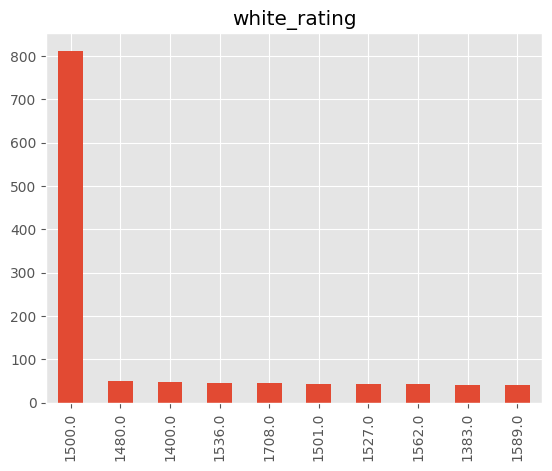

In [30]:
df['white_rating'].value_counts() \
.head(10) \
.plot(kind = 'bar', title= 'white_rating')

<Axes: xlabel='white_rating', ylabel='black_rating'>

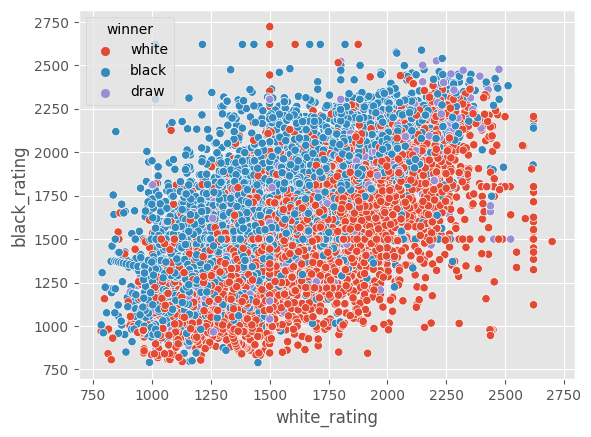

In [34]:
sns.scatterplot(x='white_rating',
                y= 'black_rating',
                hue='winner',
                data=df)


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


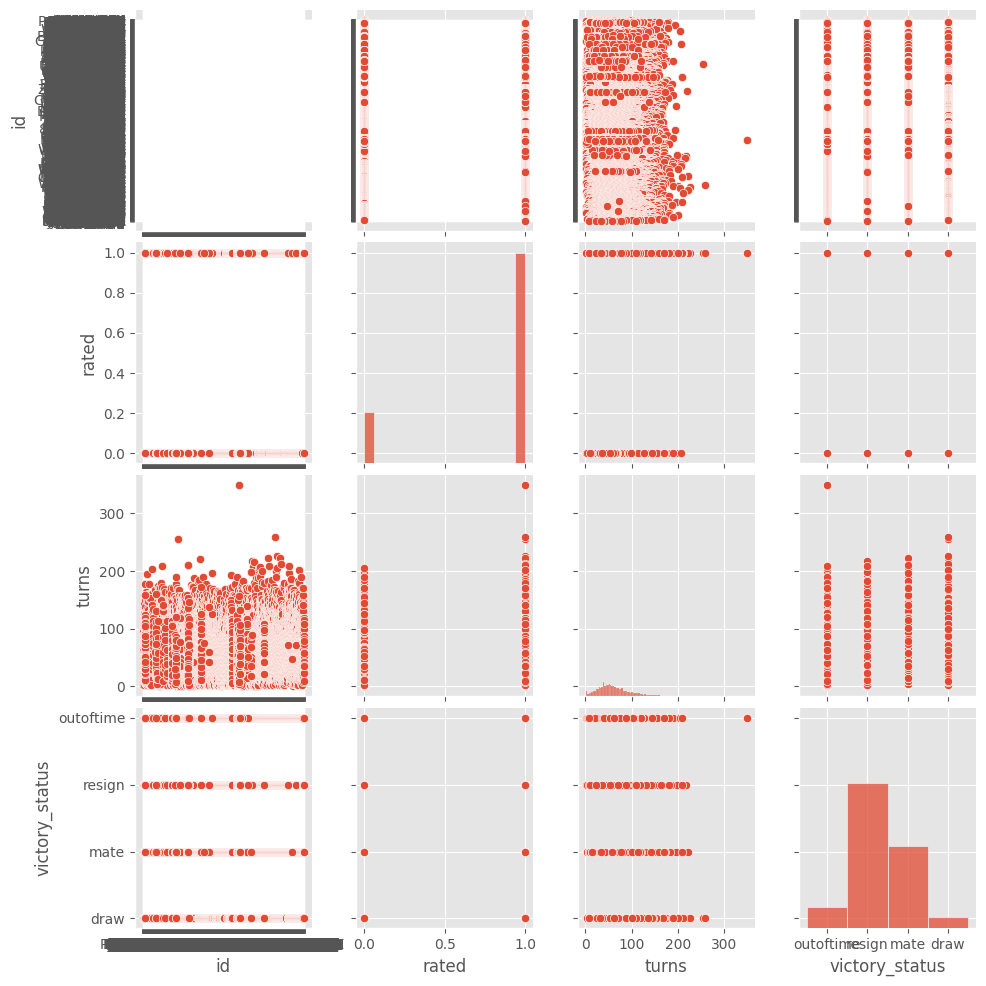

In [39]:
sns.pairplot(df, vars=['id', 'rated', 'turns', 'victory_status'])
